# Clustering Indian Liver Patient dataset using KMeans

In [1]:
import KMeansUtility
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
from IPython.display import Image
from IPython.core.display import HTML
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

## Importing data 
#### dataset: Indian Liver Patient Records https://www.kaggle.com/uciml/indian-liver-patient-records

In [2]:
# Loading the data into pandas dataframe
data_url = "https://raw.githubusercontent.com/nishil70/ML-Probably-Interesting-Data/master/data/indian_liver_patient.csv?token=Aih7BxmfhNC2dttnuokBVEuJ8bJopRelks5cczBTwA%3D%3D"
df = pd.read_csv(data_url)

#### Dropping null value rows

In [3]:
df = df.dropna()

## Data Exploration using pandas, seaborn and Google Facets
### The aim here is to get familier with the data and its distribution

In [4]:
df.shape

(579, 11)

In [5]:
df.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [6]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,44.782383,3.315371,1.494128,291.366149,81.126079,110.414508,6.481693,3.138515,0.947064,1.284974
std,16.221786,6.227716,2.816499,243.561863,183.182845,289.850034,1.084641,0.794435,0.319592,0.451792
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [7]:
Images = ["https://raw.githubusercontent.com/nishil70/ML-Probably-Interesting-Data/master/distributions/Age.PNG?token=Aih7B7TZbRCg7_0NIXnmESFte-oyFBrfks5cczsuwA%3D%3D", "https://raw.githubusercontent.com/nishil70/ML-Probably-Interesting-Data/master/distributions/Albumin.PNG?token=Aih7B7Dfz8NCeJ0qLxmF1K_x7yya1Ao4ks5ccznAwA%3D%3D", "https://raw.githubusercontent.com/nishil70/ML-Probably-Interesting-Data/master/distributions/Total_Protiens.PNG?token=Aih7B14Oa-zgKjKoQAIBjK0AKnvBhvkVks5ccznSwA%3D%3D"]
for x in Images:
    display(Image(url= x))#, width=300, height=300))

### Visualizing Data with Pair Plot
- Main aim here is to identify how different features co-relate with each other
- As seen from charts 'Albumin' and 'Total Protiens' have good linear relationship which can possibly be exploited using KMeans

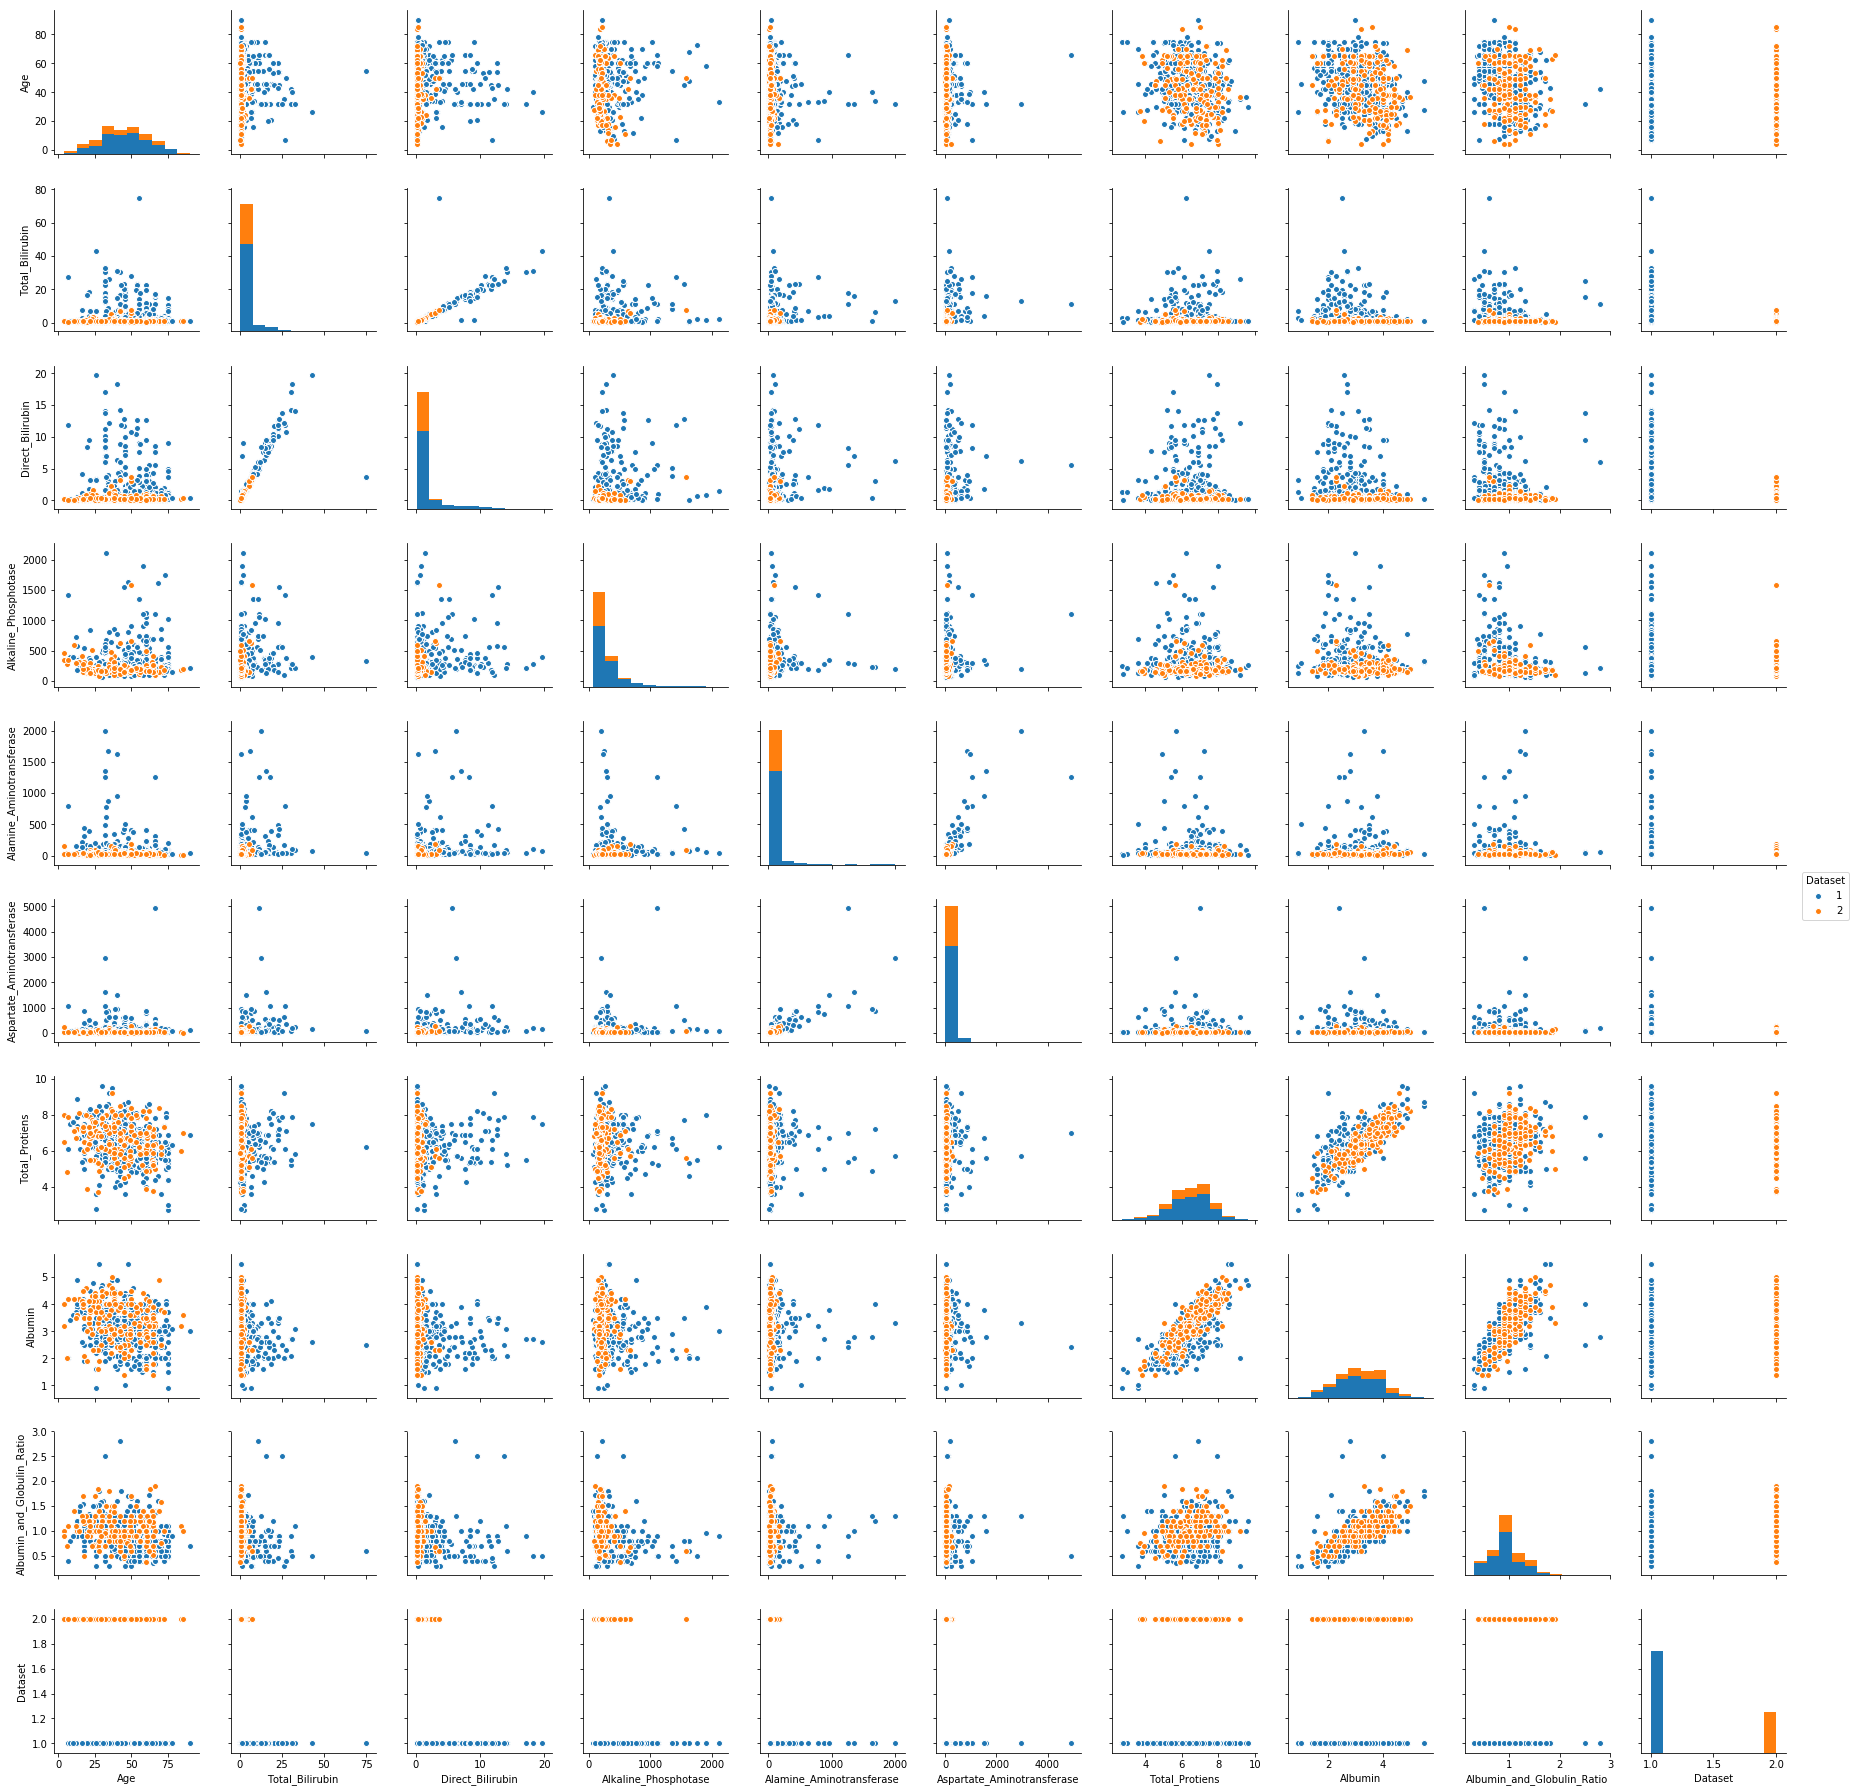

In [8]:
sns.pairplot(df, hue = 'Dataset')

### Plotting Albumin vs Total_Protiens which we will try to map using KMeans

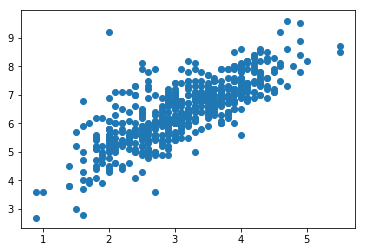

In [9]:
plt.scatter(df['Albumin'].values, df['Total_Protiens'].values)
plt.show()

## Data Preparation

In [10]:
df.shape
data = df[['Albumin','Total_Protiens']]

#### Removing the outliers - remains a critical step for an efficient KMeans (uses less iterations)

In [11]:
from scipy import stats
data = data[(np.abs(stats.zscore(data)) < 1.5).all(axis=1)]

#### Plotting again after Removing the outliers

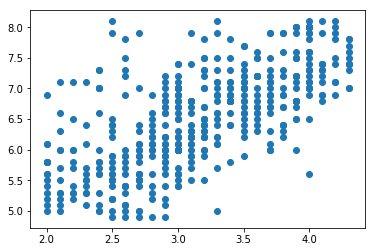

In [12]:
plt.scatter(data['Albumin'].values, data['Total_Protiens'].values)
plt.show()

In [13]:
data = data.values

# KMeans demonstration with K = 2

In [59]:
k = 2
maxIter = 10000

In [60]:
initCentroids = KMeansUtility.randomCentroids(k,data)

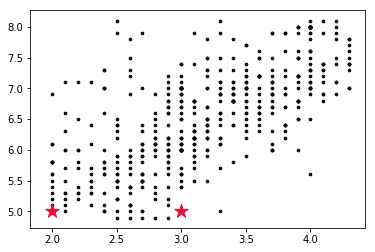

In [61]:
KMeansUtility.plotCentroids(initCentroids,data)

In [62]:
clusters, centroids = KMeansUtility.KMeans(k,data,maxIter)

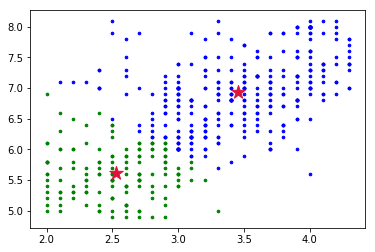

In [63]:
KMeansUtility.printClusters(k,data,clusters,centroids)

## Results:
- KMeans is working as expected
- I was not really able to get good results with K > 2 for this dataset, K =2 works best